In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [19]:
from datetime import datetime

start = "2019-01-01"
curr_date = datetime.now().date()
end = str(curr_date)
stock = "GOOG"


data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [20]:
data.reset_index(inplace=True)

In [21]:
print(data.shape)
data.tail()

(1349, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
1344,2024-05-06,169.220001,169.899994,167.889999,169.830002,169.830002,15147900
1345,2024-05-07,170.119995,173.470001,170.000000,172.979996,172.979996,21102400
1346,2024-05-08,170.750000,171.908997,170.522003,171.160004,171.160004,14569900
1347,2024-05-09,171.149994,172.440002,169.929993,171.580002,171.580002,11937700
1348,2024-05-10,169.690002,171.339996,167.910004,170.289993,170.289993,18726600


In [22]:
ma_100_days = data.Close.rolling(100).mean()

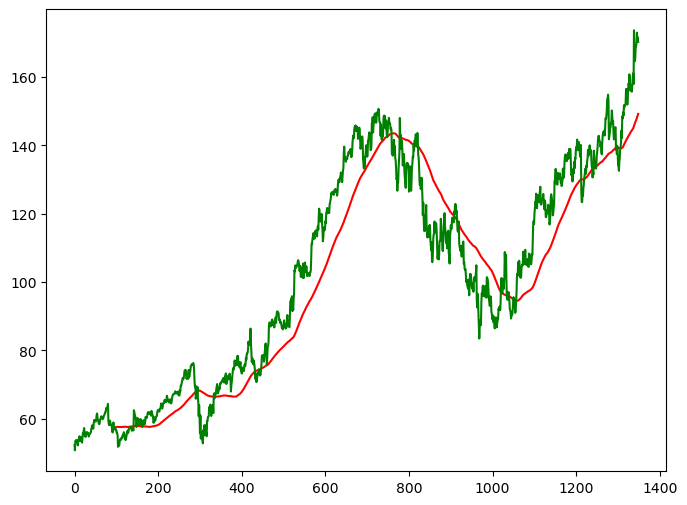

In [23]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(data.Close, "g")
plt.show()

In [24]:
ma_200_days = data.Close.rolling(200).mean()

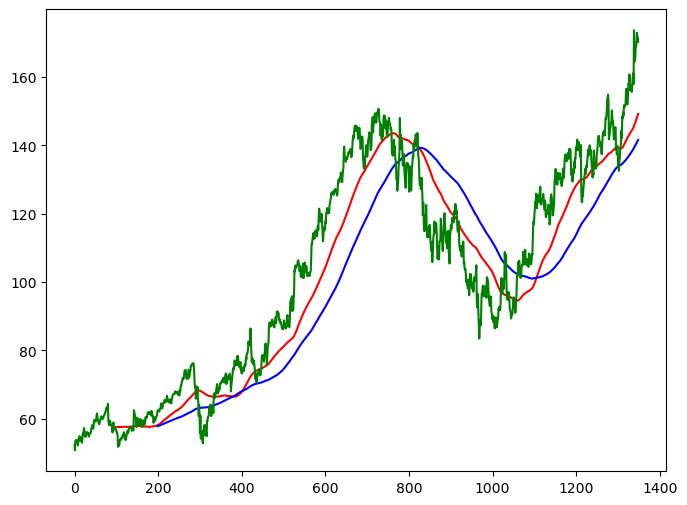

In [26]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(ma_200_days, "b")
plt.plot(data.Close, "g")
plt.show()

In [27]:
data.dropna(inplace=True)

In [35]:
data_train = pd.DataFrame(data.Close[: int(len(data) * 0.8)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.8):])

print(data_train.shape, data_test.shape)

(1079, 1) (270, 1)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
data_train_scale = scaler.fit_transform(data_train)

In [38]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i,0])

In [40]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [43]:
x, y = np.array(x), np.array(y)

In [48]:
model = Sequential()
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5)) # makes model not too overfitted
          
model.add(Dense(units=1))

In [49]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [51]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0040
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0047
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0041
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0045
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0044
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0038
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0054
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0050
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0043
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0040
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0042
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0051
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0043
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0042
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0036


In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index= True)

In [56]:
data_test

,Close
0,97.800003
1,95.830002
2,97.330002
3,98.820000
4,97.599998
...,...
365,169.830002
366,172.979996
367,171.160004
368,171.580002


In [57]:
data_test_scale = scaler.fit_transform(data_test)

In [60]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i,0])
    
    
x, y = np.array(x), np.array(y)

In [61]:
y_pred = model.predict(x)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [62]:
y_pred

array([[0.23264152],
       [0.23619258],
       [0.23850882],
       [0.23910311],
       [0.23820913],
       [0.23641755],
       [0.23458202],
       [0.23283304],
       [0.23112744],
       [0.23043457],
       [0.23136482],
       [0.23380542],
       [0.23672405],
       [0.23926291],
       [0.24071921],
       [0.24107838],
       [0.24114658],
       [0.24154483],
       [0.24354982],
       [0.24771668],
       [0.25369   ],
       [0.26100403],
       [0.26898527],
       [0.27707788],
       [0.28503683],
       [0.29277635],
       [0.30050611],
       [0.30785155],
       [0.31385604],
       [0.31807217],
       [0.32074282],
       [0.3222111 ],
       [0.32245702],
       [0.3219551 ],
       [0.32140368],
       [0.32195374],
       [0.32484025],
       [0.32873437],
       [0.33225542],
       [0.33479258],
       [0.33677948],
       [0.33891085],
       [0.34169725],
       [0.3456869 ],
       [0.35045758],
       [0.35516793],
       [0.3588731 ],
       [0.361

In [65]:
scale = 1/scaler.scale_

In [66]:
scale

array([87.23000336])

In [67]:
y_pred *= scale

In [68]:
y *= scale

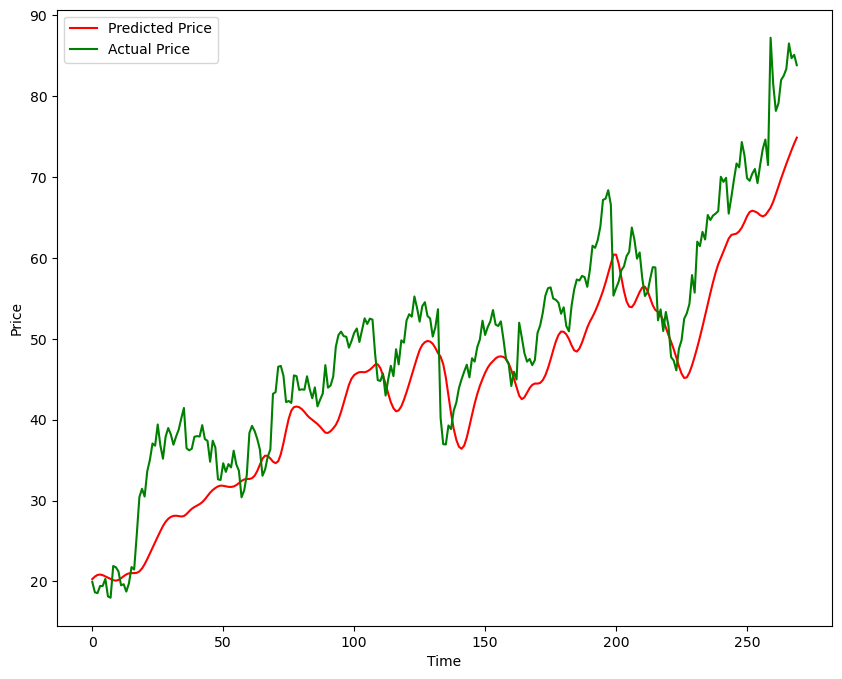

In [69]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, "r", label="Predicted Price")
plt.plot(y, "g", label="Actual Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [70]:
model.save("stock-model.keras")